We are trying to predict the survivors of the titanic with the data of the passengers. 

Our goal is to the use Ridge and Lasso regression. 

## Importation librairies 


In [ ]:
# importation librairies 

#basic libraries
import numpy as np 
import pandas as pd 
import os 

# graphic libraries 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# (from the teacher's notebook)
np.random.seed(42)

# from kaggle : https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python 
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid",color_codes=True)

# in order to classify the training and testing set 
from sklearn.model_selection import StratifiedShuffleSplit 


## Download train set from Kaggle 

In [ ]:
# We want to download the data from Kaggle 

data = pd.read_csv("train.csv",delimiter=",")

# preview train data
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

# number of sample in the data set 
print('The number of samples into the train data is {}.'.format(data.shape[0]))

The number of samples into the train data is 891.


## Checking the data quality and the missing value assessment 


In [ ]:
# check missing values in train data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that the age section and the cabin one have respectively 177 and 687 missing values. We can take this 2 sections into account, otherwise the analysis would be inexact. 


### Missing values : Ages and Cabin 


Percent of missing "Age" records is 19.87%
The mean of "Age" is 29.70
The median of "Age" is 28.00


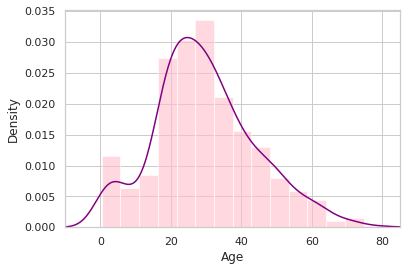

In [ ]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))

# mean age
print('The mean of "Age" is %.2f' %(data["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(data["Age"].median(skipna=True)))

# the plot of the Age data in teh train set 
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='pink', alpha=0.6)
data["Age"].plot(kind='density', color='purple')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.


In [ ]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


### Final adjustments to data 




Based on my assessment of the missing values in the dataset, we make the following changes to the data:

    - If "Age" is missing for a given row, we impute with 28 (median age).
    - we ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available, it appears that this value is associated with the passenger's class and fare paid.



In [ ]:
train = data.copy()
train["Age"].fillna(data["Age"].median(skipna=True), inplace=True)
train["Embarked"].fillna(data['Embarked'].value_counts().idxmax(), inplace=True)
train.drop('Cabin', axis=1, inplace=True)

# check missing values in adjusted train data
print(train.isnull().sum())

# preview adjusted train data
print(train.head())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0            1         0       3  ...         A/5 21171   7.2500         S
1            2         1       1  ...          PC 17599  71.2833         C
2            3         1       3  ...  STON/O2. 3101282   7.9250         S
3            4         1       1  ...            113803  53.1000         S
4            5         0       3  ...            373450   8.0500         S

[5 rows x 11 columns]


Let's see how the data of the age section were adjusted 


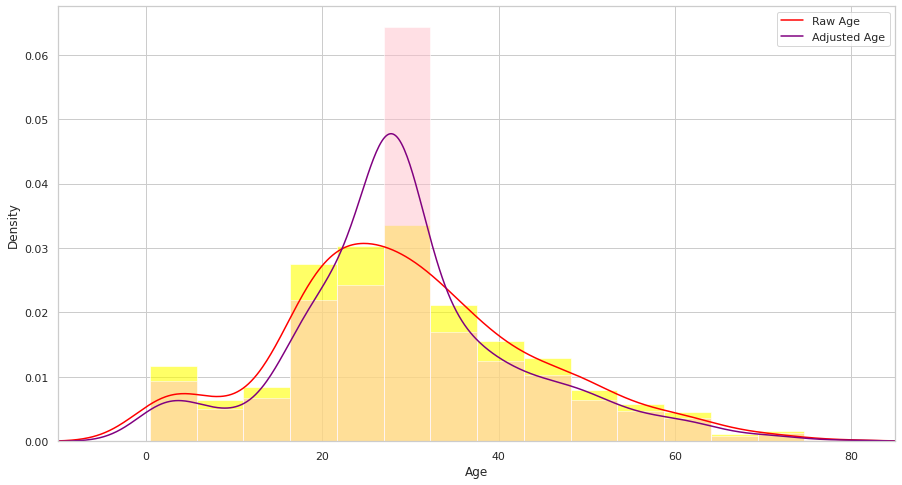

In [ ]:
plt.figure(figsize=(15,8))

ax = data["Age"].hist(bins=15, density=True, stacked=True, color='yellow', alpha=0.6)
data["Age"].plot(kind='density', color='red')

ax = train["Age"].hist(bins=15, density=True, stacked=True, color='pink', alpha=0.5)
train["Age"].plot(kind='density', color='purple')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## Visualisation 

In [ ]:


cat_var = ["Survived", "Pclass","Sex","Embarked"]
train[cat_var] = train[cat_var].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.7+ KB


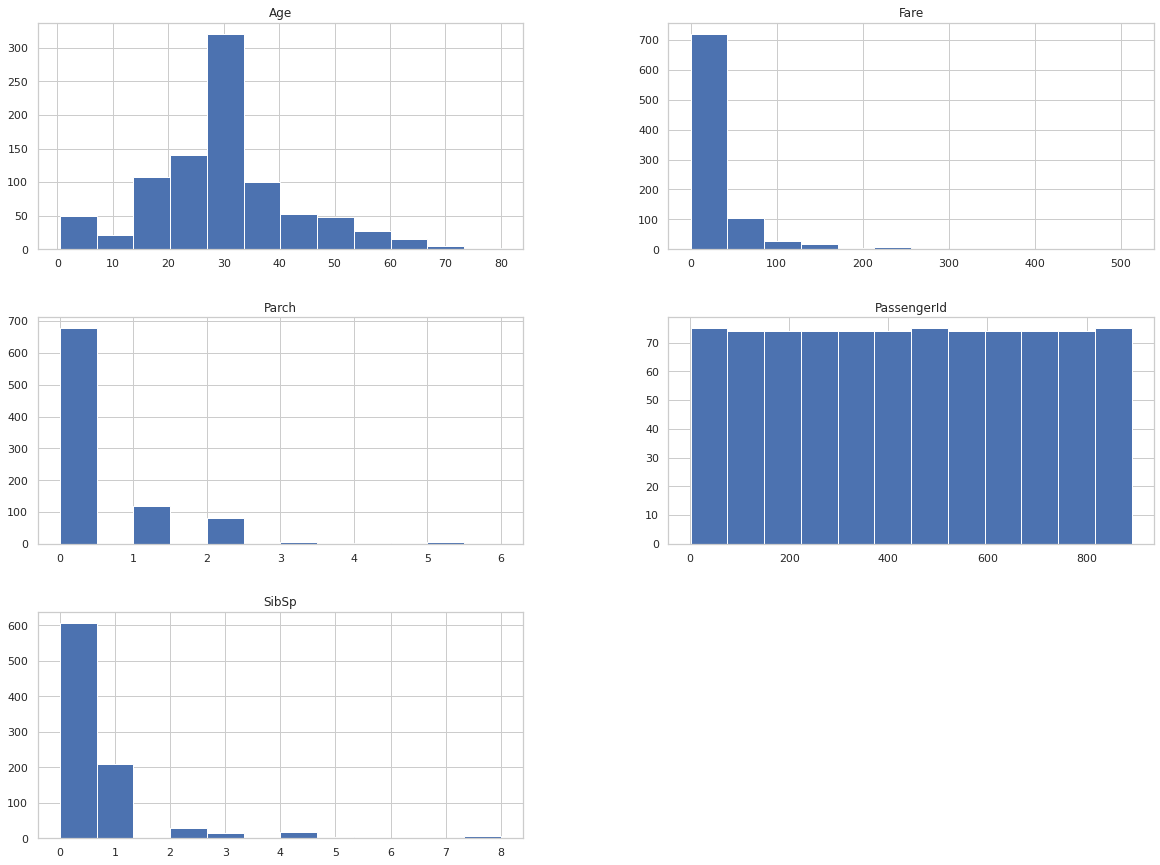

In [ ]:
import matplotlib.pyplot as plt 

train.hist(bins=12, figsize=(20,15))
plt.show()

In [ ]:
train.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208
std,257.353842,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


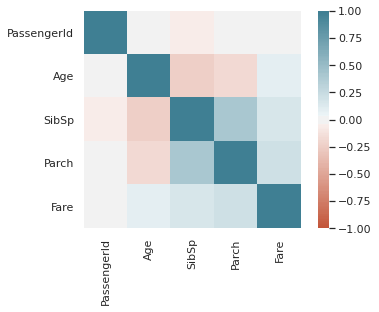

In [ ]:
# Correlation 
corr = train.corr()
train.shape
corr.shape

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)

## Logistic Regression with the new train set 


We first delete instance where categorical variables contain NaN


In [ ]:
#train.columns 
#train.isnull.sum()


#train = train.where(train[cat_var].isnull(()))[0]
#id_delete 
#train = train.drop(id_delete, axis = 0)
#train.isnull().sum()


Stratified split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit 
print(train)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train, train["Survived"]):
  strat_train_set = train.iloc[train_index]
  strat_test_set = train.iloc[test_index]



     PassengerId Survived Pclass  ...            Ticket     Fare  Embarked
0              1        0      3  ...         A/5 21171   7.2500         S
1              2        1      1  ...          PC 17599  71.2833         C
2              3        1      3  ...  STON/O2. 3101282   7.9250         S
3              4        1      1  ...            113803  53.1000         S
4              5        0      3  ...            373450   8.0500         S
..           ...      ...    ...  ...               ...      ...       ...
886          887        0      2  ...            211536  13.0000         S
887          888        1      1  ...            112053  30.0000         S
888          889        0      3  ...        W./C. 6607  23.4500         S
889          890        1      1  ...            111369  30.0000         C
890          891        0      3  ...            370376   7.7500         Q

[891 rows x 11 columns]


In [ ]:
len(train["Survived"])

891

In [ ]:
strat_test_set["Survived"].value_counts()/len(strat_test_set)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [ ]:
y_train = strat_train_set["Survived"]
x_train = strat_train_set.drop(columns =["Survived"])

y_test = strat_train_set["Survived"]
x_test = strat_train_set.drop(columns =["Survived"])

train[train.isnull().any(axis=1)].head(20)
train[train.isnull().any(axis=1)].shape

(0, 11)

Prepare the data 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

num_pipeline = Pipeline([
                         ('imputer',SimpleImputer(strategy="median")),#imput missing value for numerical variables 
                         ('std_scaler',StandardScaler()),
])

num_attribs = list(x_train.select_dtypes(include=['number']))
cat_attribs = list(x_train.select_dtypes(include=['category']))

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),
])

X_train = full_pipeline.fit_transform(x_train)
X_test = full_pipeline.fit_transform(x_test)

**Logistic Regression and cross-table**



In [ ]:
# Logistic regression 

from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(solver="liblinear",random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)
log_reg.score(X_test, y_test)

#Predictions 
y_proba = log_reg.predict_proba(X_test)
y_hat = (y_proba[:, 0] < 0.5)*1

pd.crosstab(y_test, y_hat, margins = False)

col_0,0,1
Survived,,
0,381,58
1,78,195


Calibration of the Logistic regression and score

In [ ]:
# Crossed Validation for the Ridge regression
# pour calibrer la logistic regression

# to determine the minimum we use the function l1_min_c
from sklearn.svm import l1_min_c
cs = l1_min_c(X_train, y_train, loss='log')*np.logspace(0,7,16)

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, n_jobs =3).fit(X_train, y_train)
clf.C_
clf.scores_
clf.score(X_test, y_test)

0.8047752808988764

## Crossed Validation for RIDGE and LASSO

**Ridge**


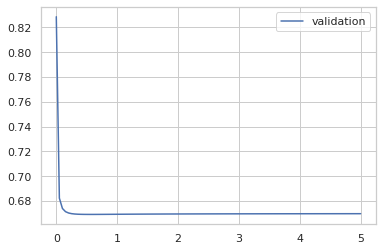

C optimal = 0.5556444444444445


In [ ]:
# predict a linear varible is Classification
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Ridge 

# defining the grid 
cs = np.linspace(0.0001, 5, 100)
cs 

# we want to minimize the LogisticR function
# initialization of the object where we want to apply the crossed validation
logreg = LogisticRegression(solver="liblinear")
parameters = {'C': cs}

# We run the crossed validation
nb_cores = 3 #To run in parallel, must be <= nb_cores of your computer -1
log_regressor=GridSearchCV(logreg, parameters, scoring='neg_log_loss', cv=5,n_jobs=3)
log_regressor.fit(X_train,y_train)

log_regressor.best_params_
log_regressor.best_score_
log_regressor.best_estimator_

cvres = log_regressor.cv_results_
cvres.keys()
rmse_val = np.sqrt(- cvres["mean_test_score"])

#Plot the error calculated on validation set 
plt.plot(cs, rmse_val, 'b-', label = "validation")
plt.legend()
plt.show()

# Fit the optimal model 
C_opt = log_regressor.best_params_["C"]
C_opt 

#refit on all training set

#Logistic regression 
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(C = C_opt, solver="liblinear",random_state=42)
log_reg.fit(X_train,y_train)
log_reg.score(X_test, y_test)


# Print 

print('C optimal =', C_opt)

In [ ]:
#Predictions 
y_proba = log_reg.predict_proba(X_test)
y_hat = (y_proba[:, 0] < 0.5)*1

pd.crosstab(y_test, y_hat, margins = False)

col_0,0,1
Survived,,
0,381,58
1,79,194


We observe that the cross-table haven't change much. The difference is about only one survivor. 

**Lasso**

We can take the same code as the Ridge but we add a penalty. By default, the Ridge would have the l2 penalty. So, in order the lauch the Lasso, we change the penalty to be l1. 

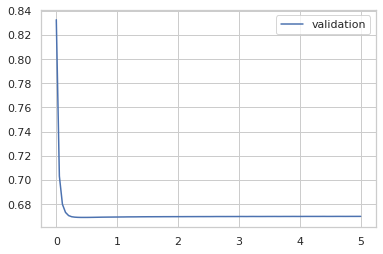

C optimal = 0.4546363636363636


In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import Lasso 

cs = np.linspace(0.0001, 5, 100)
cs 

# we add the penalty, the l1 is lasso and the l2 is Ridge
logreg = LogisticRegression(solver="liblinear", penalty='l1')
parameters = {'C': cs}


nb_cores = 
log_regressor=GridSearchCV(logreg, parameters, scoring='neg_log_loss', cv=5,n_jobs=3)
log_regressor.fit(X_train,y_train)

log_regressor.best_params_
log_regressor.best_score_
log_regressor.best_estimator_

cvres = log_regressor.cv_results_
cvres.keys()
rmse_val = np.sqrt(- cvres["mean_test_score"])


plt.plot(cs, rmse_val, 'b-', label = "validation")
plt.legend()
plt.show()

# Fit the optimal model 
C_opt = log_regressor.best_params_["C"]
C_opt 

#refit on all training set

#Logistic regression 
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(C = C_opt, solver="liblinear",penalty='l1',random_state=42)
log_reg.fit(X_train,y_train)
log_reg.score(X_test, y_test)


# Print 

print('C optimal =', C_opt)


In [ ]:
#Predictions 
y_proba = log_reg.predict_proba(X_test)
y_hat = (y_proba[:, 0] < 0.5)*1

pd.crosstab(y_test, y_hat, margins = False)

col_0,0,1
Survived,,
0,377,62
1,79,194
